In [1]:
# ------------------------------------------------------------------------------------------------------------------------------
# Problem Statement :- Predictions of the future population of India using historical data. A. To predict the future population, we
# need to understand how it will be implemented. B. Using an appropriate machine learning algorithm, we
# can build a model that can predict population with high accuracy. C. Assumption: - use authentic historical
# data in excel, csv file. Use appropriate algorithms to meet high accuracy. Use of statistics and feature
# engineering is more appreciable.
# Team : BotArmy
# Team Members: Atharva Deshpande (PC-06)
#               Hrishank Chhatbar (PC-05)                
# We will follow the standard Convention of writing comments whenever it is required
# We will follow the standard Procedure related to a Data Science Project:-
# 1.) Data Loading
# 2.) Data Pre-processing
# 3.) Key visual Insights
# 4.) Model building and Pipelining
# 5.) Predictiona and Comparision of various models
# 6.) Selecting the model that fits best related to our problem statement
# -------------------------------------------------------------------------------------------------------------------------------

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
# We have loaded the dataset of population of India from 1950 to 2021

In [34]:
df = pd.read_csv('C:/Users/Acer/Desktop/Indian_pop.csv')

In [35]:
df.head(10)

,Year,Population,GrowthRate
0,2021,1393409038,0.97
1,2020,1380004385,0.99
2,2019,1366417754,1.02
3,2018,1352642280,1.04
4,2017,1338676785,1.07
5,2016,1324517249,1.10
6,2015,1310152403,1.12
7,2014,1295600772,1.15
8,2013,1280842125,1.19
9,2012,1265780247,1.24


In [36]:
df.tail(10)

,Year,Population,GrowthRate
62,1959,441798578,1.94
63,1958,433380978,1.91
64,1957,425270695,1.88
65,1956,417442811,1.84
66,1955,409880595,1.81
67,1954,402578596,1.78
68,1953,395544369,1.73
69,1952,388799073,1.68
70,1951,382376948,1.61
71,1950,376325200,0.00


In [37]:
df.describe()

,Year,Population,GrowthRate
count,72.00000,7.200000e+01,72.000000
mean,1985.50000,8.289174e+08,1.835833
std,20.92845,3.243571e+08,0.467103
min,1950.00000,3.763252e+08,0.000000
25%,1967.75000,5.287355e+08,1.605000
50%,1985.50000,7.931676e+08,1.940000
75%,2003.25000,1.116048e+09,2.187500
max,2021.00000,1.393409e+09,2.360000


In [42]:
df.shape

(72, 3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        72 non-null     int64  
 1   Population  72 non-null     int64  
 2   GrowthRate  72 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


In [39]:
# so we can say all of our data is numerical data

In [40]:
df.isnull().sum()

Year          0
Population    0
GrowthRate    0
dtype: int64

In [43]:
# We will plot some graphs related to population corresponding to the year

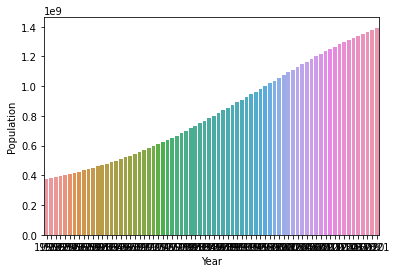

In [46]:
sns.barplot(x = 'Year',y = 'Population',data = df)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Population'>

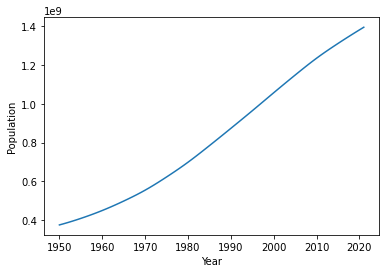

In [45]:
sns.lineplot(x=df['Year'],y=df['Population'])

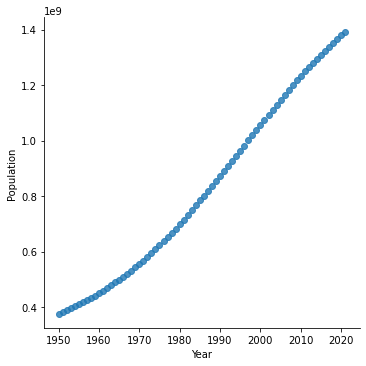

In [53]:
sns.lmplot(data= df, x= 'Year', y='Population', fit_reg=False)

In [47]:
# we will understand what is the relation of population with growth rate

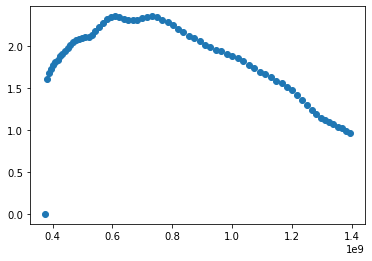

In [51]:
plt.scatter(x = 'Population',y = 'GrowthRate',data = df)
plt.show()

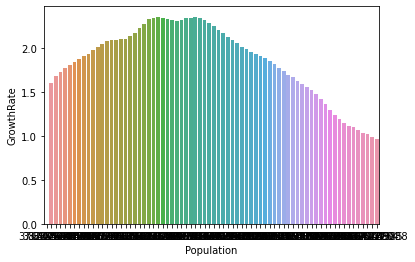

In [63]:
sns.barplot(x = 'Population',y = 'GrowthRate',data = df)
plt.show()

In [ ]:
# we will understand what is the relation of year with growth rate

<AxesSubplot:xlabel='Year', ylabel='GrowthRate'>

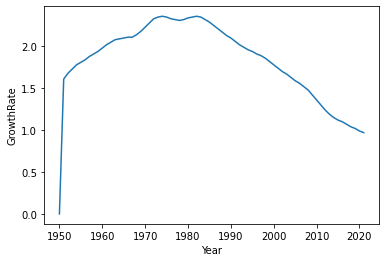

In [64]:
sns.lineplot(x=df['Year'],y=df['GrowthRate']) 

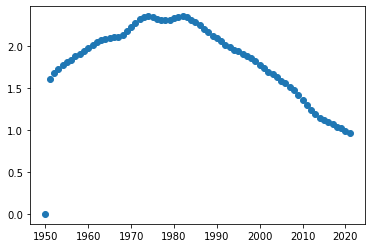

In [65]:
plt.scatter(x = 'Year',y = 'GrowthRate',data = df)
plt.show()

In [52]:
# Try to find co-relation among different parameters

<AxesSubplot:>

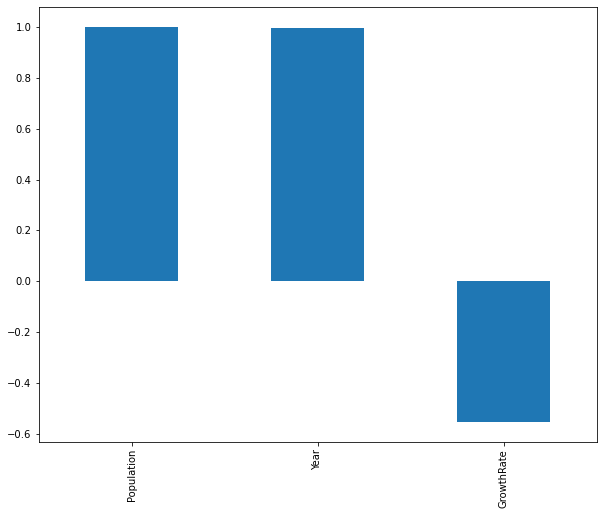

In [55]:
plt.figure(figsize=(10,8))
df.corr()['Population'].sort_values(ascending = False).plot(kind = 'bar')

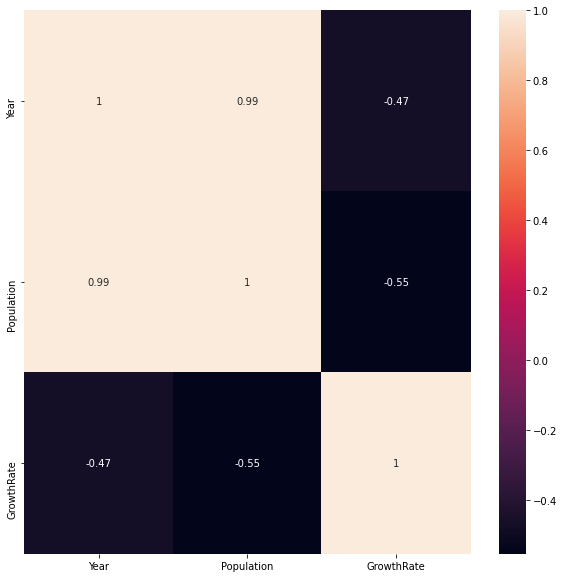

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# key Insights Found Till now:- 

In [62]:
# So from above 2 visualizations we can conclude that population is very strongly correlated with year but we can see that 
# population and year both are negatively correlated with Growthrate

In [66]:
# The rate of growth of the population or the growth rate takes a curve after 1980 (approx). Till 1980 Population is increasing
# with a constant growth rate but after that growth rate is decreasing that is population is increasing but at a slow rate.


In [67]:
# We found that year and population are strongly correlated as population is something which is cumulative. So it does makes
# sense that population is increasing every year(birth rate>death rate) hence they are strongly correlated.

In [68]:
# Now we can do statistical modelling on our data

In [70]:
x = df['Population'].tolist()
y = df['Year'].tolist()
x = sm.add_constant(x)  
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6046.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.08e-69
Time:                        01:31:31   Log-Likelihood:                -159.69
No. Observations:                  72   AIC:                             323.4
Df Residuals:                      70   BIC:                             327.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1932.3228      0.734   2633.617      0.0

In [ ]:
# We can see R-Squared value to be very high that is 0.989 that means 98.9 percentage of the variation of in year is explained
# by Population.

In [71]:
x = df['GrowthRate'].tolist()
y = df['Year'].tolist()
x = sm.add_constant(x)  
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     20.34
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           2.55e-05
Time:                        01:32:02   Log-Likelihood:                -311.44
No. Observations:                  72   AIC:                             626.9
Df Residuals:                      70   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2024.5260      8.926    226.807      0.0

In [ ]:
# We can see R-Squared value to be quiet low that is 0.225 that means 22.5 percentage of the variation of in year is explained
# by Growth rate.

In [72]:
x = df['GrowthRate'].tolist()
y = df['Population'].tolist()
x = sm.add_constant(x)  
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     31.09
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.32e-07
Time:                        01:32:23   Log-Likelihood:                -1499.4
No. Observations:                  72   AIC:                             3003.
Df Residuals:                      70   BIC:                             3007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.536e+09   1.31e+08     11.744      0.0

In [ ]:
# We can see R-Squared value to be quiet low that is 0.308 that means 30.8 percentage of the variation of in year is Population
# by Growth rate.

In [73]:
# Model Building

In [74]:
# Linear Regression

In [119]:
linreg = LinearRegression()
x = df[['Year']]
y = df[['Population']]
mod = linreg.fit(x,y)
prediction_x = pd.DataFrame(list(range(2022,2055)),columns=['Year'])
prediction_x['Prediction'] = mod.predict(prediction_x[['Year']])z
prediction_x

,Year,Prediction
0,2022,1.391362e+09
1,2023,1.406771e+09
2,2024,1.422181e+09
3,2025,1.437590e+09
4,2026,1.452999e+09
5,2027,1.468409e+09
6,2028,1.483818e+09
7,2029,1.499228e+09
8,2030,1.514637e+09
9,2031,1.530047e+09


In [121]:
mod.predict([[2040]])

array([[1.66873145e+09]])

In [122]:
mod.predict([[2088]])

array([[2.40838418e+09]])

In [123]:
mod.predict([[2100]])

array([[2.59329736e+09]])

In [131]:
import pickle

In [132]:
filename = 'model1.sav'
pickle.dump(model_rf, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))